<a href="https://colab.research.google.com/github/EduardoZiul/T-picos-especiais-em-projeto-4/blob/main/Atividade_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Regressao Linear e Redes Neurais para Estimar a Eficiência de um Trocador de Calor

# Importando bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import Input

In [2]:
# Gerando dados simulados (exemplo)
np.random.seed(42)
n = 1000

t_quente = np.random.normal(150, 10, n)  # Temperatura do fluido quente (°C)
t_frio = np.random.normal(30, 5, n)      # Temperatura do fluido frio (°C)
vazao_quente = np.random.normal(2.5, 0.5, n)  # Vazão mássica fluido quente (kg/s)
vazao_frio = np.random.normal(3.0, 0.6, n)    # Vazão mássica fluido frio (kg/s)

# Introduzindo não-linearidades na variável de saída
eficiencia = (
    0.4 * t_quente
    - 0.2 * t_frio
    + 5 * vazao_quente
    + 3 * vazao_frio
    + 2 * np.sin(t_quente / 100)
    + 1.5 * np.log(vazao_frio + 1)
    + 0.5 * vazao_quente * t_frio / 100
    + np.random.normal(0, 0.5, n)  # ruído controlado
)

data = pd.DataFrame({
    'T_quente': t_quente,
    'T_frio': t_frio,
    'Vazao_quente': vazao_quente,
    'Vazao_frio': vazao_frio,
    'Eficiencia': eficiencia
})

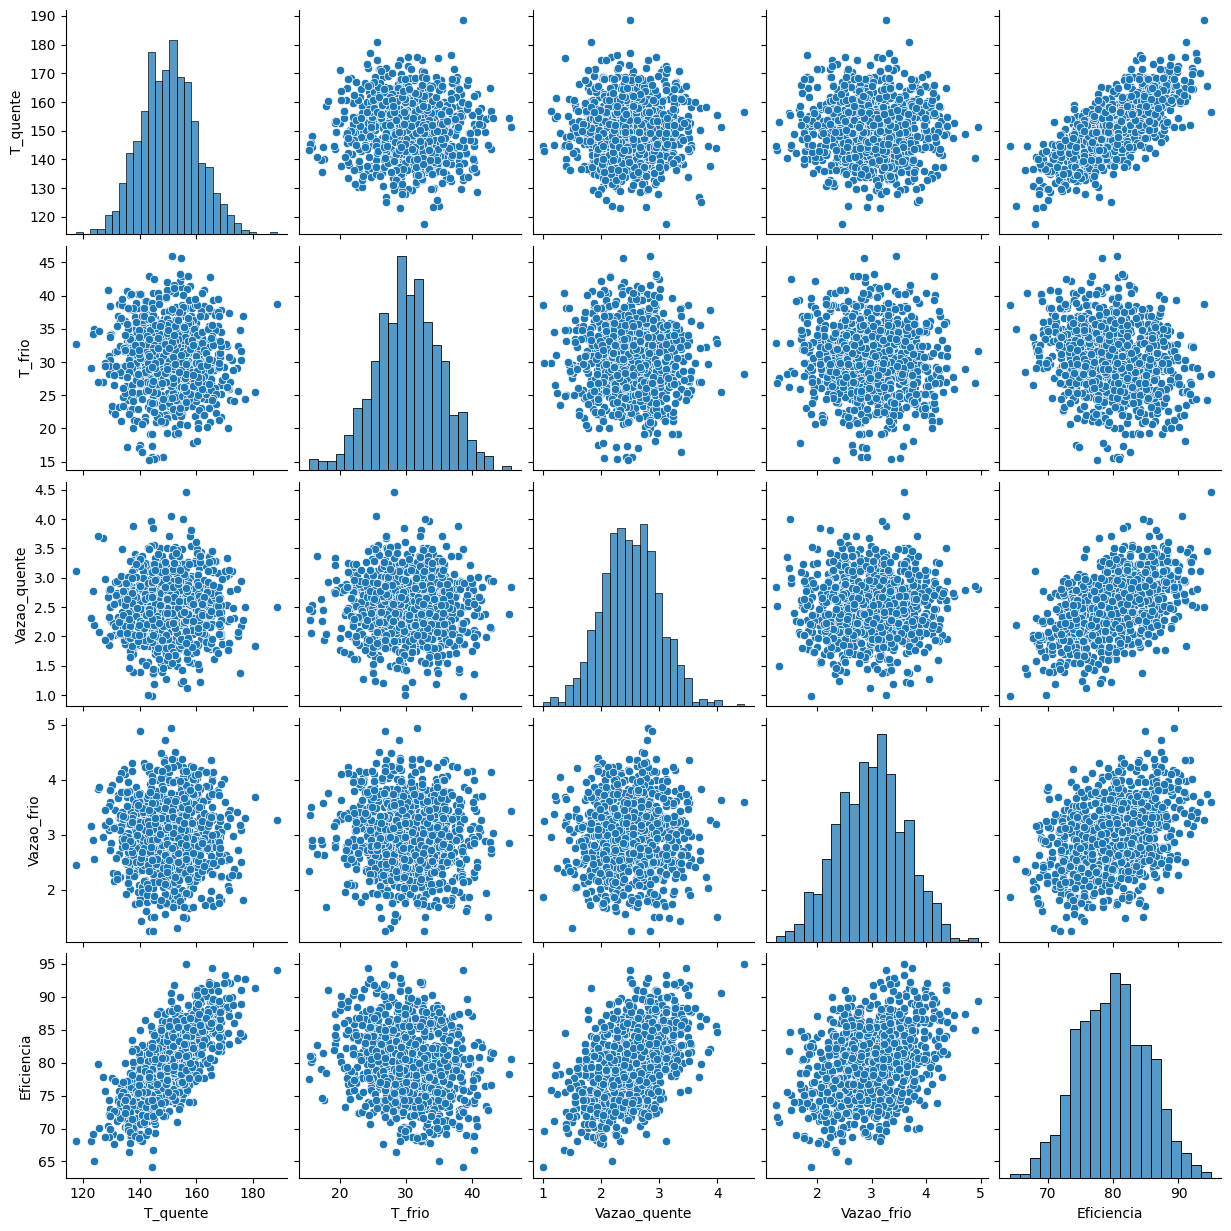

In [3]:
# Visualização dos dados
sns.pairplot(data)
plt.show()

# Separando variáveis independentes e dependente
X = data[['T_quente', 'T_frio', 'Vazao_quente', 'Vazao_frio']]
y = data['Eficiencia']

# Padronização dos dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [4]:
# ---------------------- Regressão Linear ----------------------
modelo_lr = LinearRegression()
modelo_lr.fit(X_train, y_train)
y_pred_lr = modelo_lr.predict(X_test)

print("--- Regressão Linear ---")
print("MSE:", mean_squared_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

# Exibindo os coeficientes (pesos) do modelo linear
coeficientes = pd.DataFrame({
    'Variável': X.columns,
    'Peso (coeficiente)': modelo_lr.coef_
})
print("\nMatriz de Pesos (Regressão Linear):")
print(coeficientes)


--- Regressão Linear ---
MSE: 0.2255928467322741
R²: 0.9906434435479994

Matriz de Pesos (Regressão Linear):
       Variável  Peso (coeficiente)
0      T_quente            3.911957
1        T_frio           -0.945140
2  Vazao_quente            2.556715
3    Vazao_frio            2.099744


In [5]:
# ---------------------- Rede Neural ----------------------
modelo_nn = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1)
])

modelo_nn.compile(optimizer=Adam(learning_rate=0.005), loss='mse')

early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

modelo_nn.fit(X_train, y_train, epochs=300, validation_split=0.2, callbacks=[early_stop], verbose=0)

y_pred_nn = modelo_nn.predict(X_test).flatten()

print("\n--- Rede Neural ---")
print("MSE:", mean_squared_error(y_test, y_pred_nn))
print("R²:", r2_score(y_test, y_pred_nn))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step

--- Rede Neural ---
MSE: 0.3226197450251469
R²: 0.9866192128847056


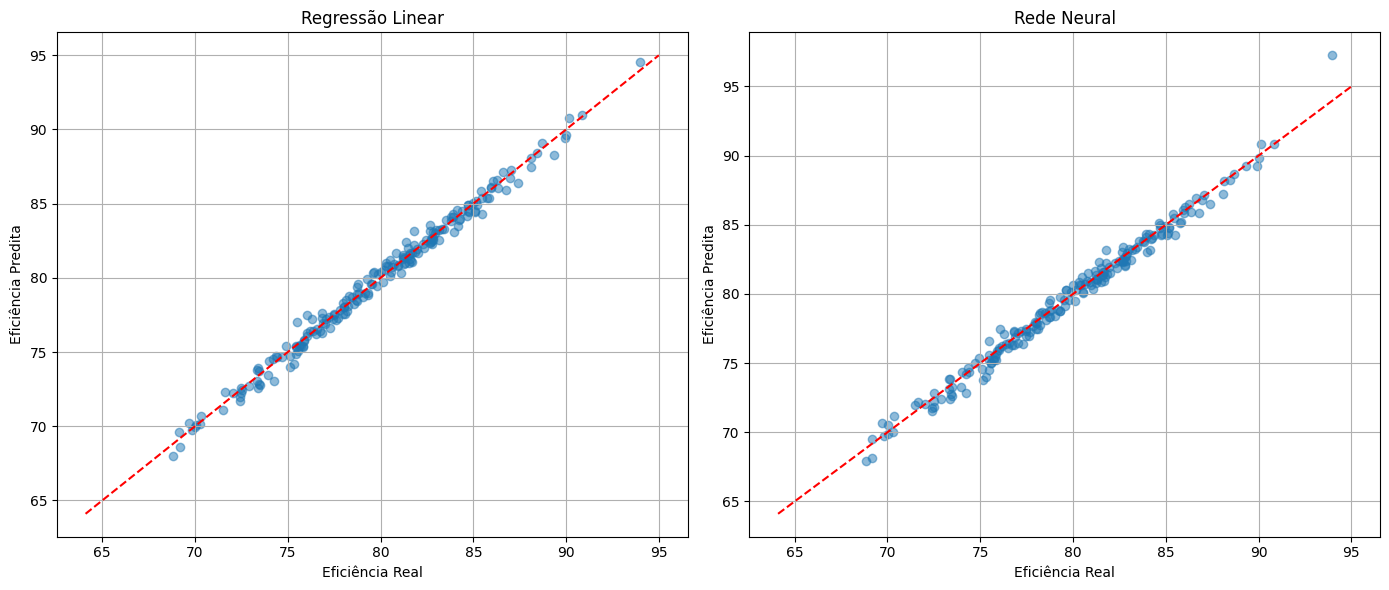

In [6]:
# ---------------------- Gráficos Comparativos ----------------------
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Regressão Linear')
plt.xlabel('Eficiência Real')
plt.ylabel('Eficiência Predita')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_nn, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Rede Neural')
plt.xlabel('Eficiência Real')
plt.ylabel('Eficiência Predita')
plt.grid(True)

plt.tight_layout()
plt.show()

In [7]:
# ---------------------- Explicação ----------------------
print("""
Comparação:
- A regressão linear é limitada a relações lineares entre as variáveis independentes e a resposta.
- A rede neural, com suas camadas ocultas e funções de ativação não-lineares, consegue capturar padrões mais complexos,
  como senóides, logaritmos e interações entre variáveis (como multiplicações).

Neste exemplo, introduzimos propositalmente elementos não-lineares na função que gera a eficiência,
resultando em uma vantagem clara para a rede neural. A diferença nos valores de R² ilustra essa maior capacidade de generalização.
""")



Comparação:
- A regressão linear é limitada a relações lineares entre as variáveis independentes e a resposta.
- A rede neural, com suas camadas ocultas e funções de ativação não-lineares, consegue capturar padrões mais complexos,
  como senóides, logaritmos e interações entre variáveis (como multiplicações).

Neste exemplo, introduzimos propositalmente elementos não-lineares na função que gera a eficiência,
resultando em uma vantagem clara para a rede neural. A diferença nos valores de R² ilustra essa maior capacidade de generalização.

